### Una vez hemos visto en el tutorial presentado por Julia, como descargar ficheros de modelos participantes en el proyecto CMIP6, vamos a proceder a hacer cálculos sencillos con ellos

![cmip6_logo-01](cmip6_logo-01.jpg)

**CMIP** es un proyecto del programa mundial de investigación climática o WRCP. Empieza el 1995, como coordinación de modelos climáticos de ditintos grupos de investigación internacionales. Se definen protocolos, forzamientos, y salidas de los modelos estandarizadas, con la intención de realizar una comparativa de los modelos, ofreciendo así una mayor robustez de los datos, para un mejor conocimiento del pasado, el presente y el futuro del clima y de su variabilidad.

**CMIP6** es su sexta versión, que comienza su desarrollo en 2014, y que hoy día supone el grueso de los modelos climáticos usados.


**Primero cargamos algunas liberías básicas para el uso de los archivos**

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Luego cargaremos los ficheros de las distintas simulaciones

### *Historical*
Esta simulación pretende ofrecer los datos del pasado reciente. A partir de que, se considera, comienza la acción del hombre sobre el clima; un hecho que ocurre sobre el año 1850, comenzando así el periodo conocido como industrial. La simulación llega hasta el año en que se configura el CMIP6, en 2014. Se caracteriza pues, porque sigue las concentraciones de gases efecto invernadero (GHGs de sus siglas en inglés) históricas. 

### *SSP ó Shared Socio Economic Pathways*
Por su parte, los escenarios climáticos son una narrativa de la evolución futura del planeta a partir del final de la simulación *historical*. En el CMIP6 se distribuyen en cinco diferentes maneras en las que el mundo puede evolucionar:

<u>Sostenibilidad</u>: el mundo comienza gradualmente a reducir las desigualdades, el consumo se reduce, existe un menor uso de la energía, etc.

<u>Medio camino (middle of the road)</u>: una narrativa donde los cambios no son muy marcados comparados con los históricos. 

<u>Regionalismos</u>: un mundo con conflictos regionales que incrementan las políticas de defensa, en detrimento de las inversiones en educación y tecnología.

<u>Desigualdad</u>: disparidades en oportunidades políticas y económicas, que lleva a desigualdades entre paises.

<u>Desarrollo basado en combustibles fósiles</u>: un mundo donde aumenta el uso de los combustibles fósiles y, por tanto, de la concentración de gases efecto invernadero.


Nosotros vamos a centrarnos en un escenario alineado con el desarrollo histórico (**SSP245**), y de un escenario pesimista (**SSP585**).

In [2]:
inpath = "./"
ds_hist = xr.open_dataset(inpath + "tos_Omon_CNRM-ESM2-1_historical_r1i1p1f2_gn_185001-201412.nc")
ds_s245 = xr.open_dataset(inpath + "tos_Omon_CNRM-ESM2-1_ssp245_r1i1p1f2_gn_201501-210012.nc")
ds_s585 = xr.open_dataset(inpath + "tos_Omon_CNRM-ESM2-1_ssp585_r1i1p1f2_gn_201501-210012.nc")

Igualmente, cargamos el archivo de area, y calculamos el area total, para poder calcular medias globales

In [3]:
ds_area = xr.open_dataset(inpath +"areacello_Ofx_CNRM-ESM2-1_historical_r1i1p1f2_gn.nc")
total_area = ds_area.areacello.sum(dim=['x', 'y'])

Calculamos las series temporales globales para cada una de las simulaciones

In [4]:
ds_hist_ts = (ds_hist.tos * ds_area.areacello).sum(dim=['x', 'y']) / total_area
ds_s245_ts = (ds_s245.tos * ds_area.areacello).sum(dim=['x', 'y']) / total_area
ds_s585_ts = (ds_s585.tos * ds_area.areacello).sum(dim=['x', 'y']) / total_area

### Vamos a observar la media de SST durante el periodo histórico

Text(0.5, 1.0, 'Global Mean Sea Surface Temperature')

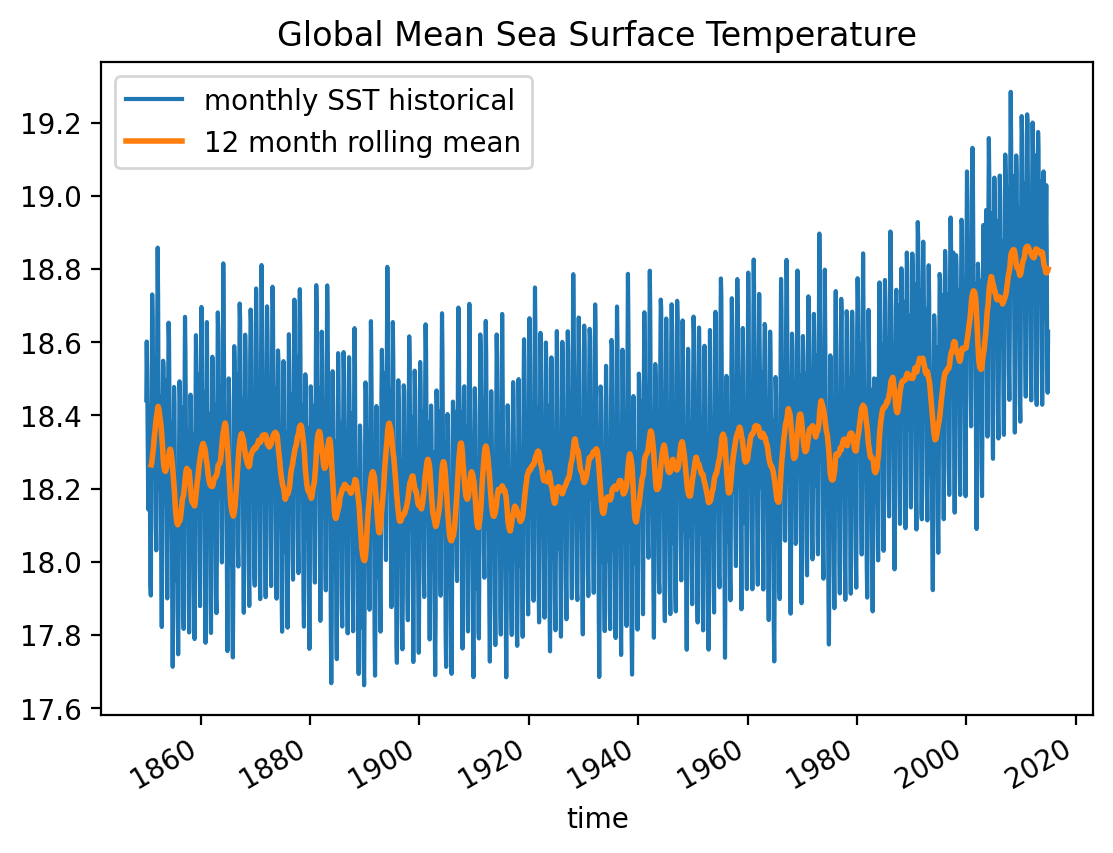

In [5]:
ds_hist_ts.plot(label='monthly SST historical')
ds_hist_ts.to_pandas().rolling(12).mean().plot(
    label='12 month rolling mean',lw=2) # Como vimos anteriormente, usando rolling mean podemos suavizar la serie temporal
plt.legend()
plt.title('Global Mean Sea Surface Temperature')

## Cálculo de nivel de calentamiento global

Los niveles de calentamiento global se miden en relación al nivel de temperatura global, dada la concentración de GHGs, antes de que la actividad antropogénica comenzara a cambiar la química atmosférica. Ese momento, como vimos antes, *preindustrial*, se considera anterior al año **1850**. 

Normalmente, el nivel de calentamiento global se calcula eliminando el nivel de temperatura global media de la simulación conocida como *piControl*. Esta simulación comienza luego de cientos de años de *spin-up*, durante el cual se pretende que el "clima" se estabilice con el forzamiento (los flujos de carbono entre los diferentes componentes se estabilizan con el forzamiento climático, en forma de concentraciones de CO$_2$). La *piControl*, con una duración recomendada de 500 años, en la que no existe una evolución de condiciones como la histórica, sino que las condiciones son estables a condiciones *preindustrial*. A partir de esta simulación, se inicia la *historical*. 

Sin embargo, podemos aproximar que ese valor será similar al nivel de calentamiento global del año 1850, donde empieza la denominada simulación *historical*.

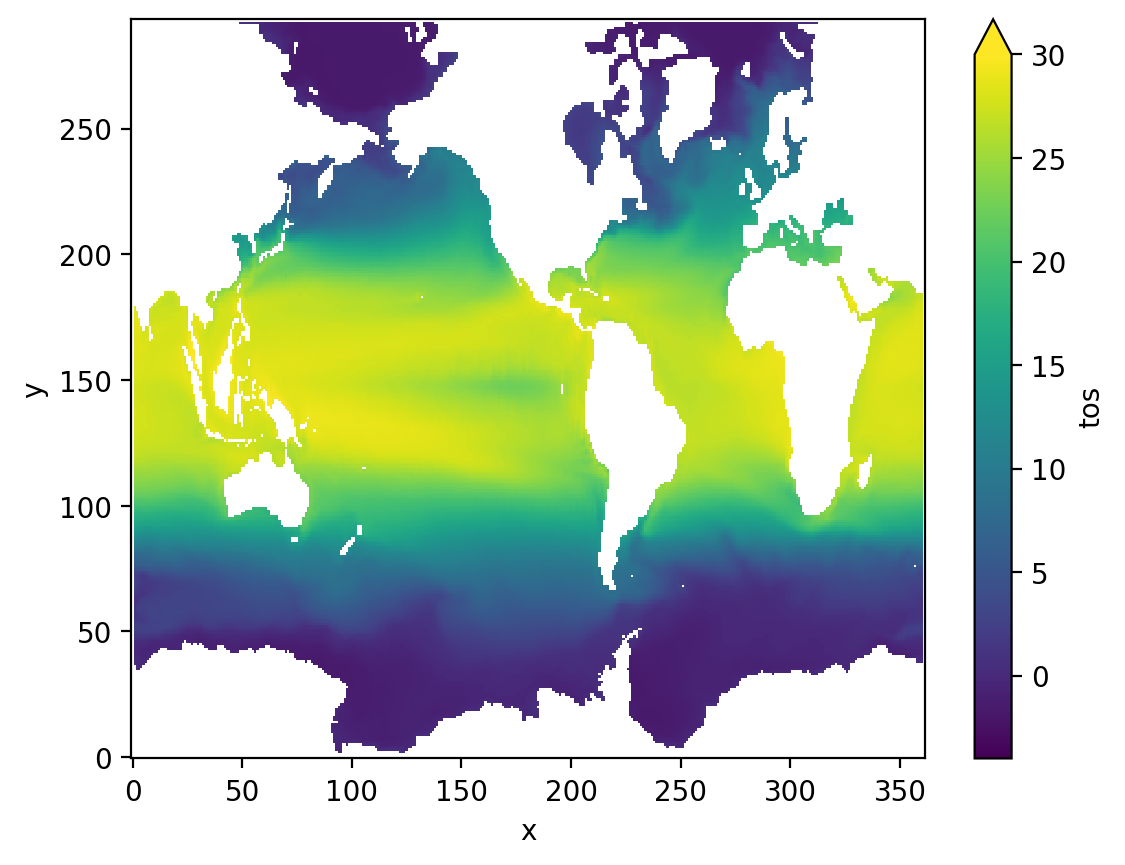

In [6]:
preindustrial = ds_hist.tos.sel(time="1850").mean('time')
preindustrial.plot(vmin=-4,vmax=30) # Éste es el estado de la SST en el momento en que la actividad industrial comienza

In [7]:
# Haciendo uso de la media de temperatura para el año 1850, calculamos nuestro valor de referencia para el océano global.
pi_value=(preindustrial*ds_area.areacello).sum(dim=['x', 'y']) / total_area
pi_value.values

array(18.264574, dtype=float32)

In [8]:
import seaborn as sns
from matplotlib import gridspec

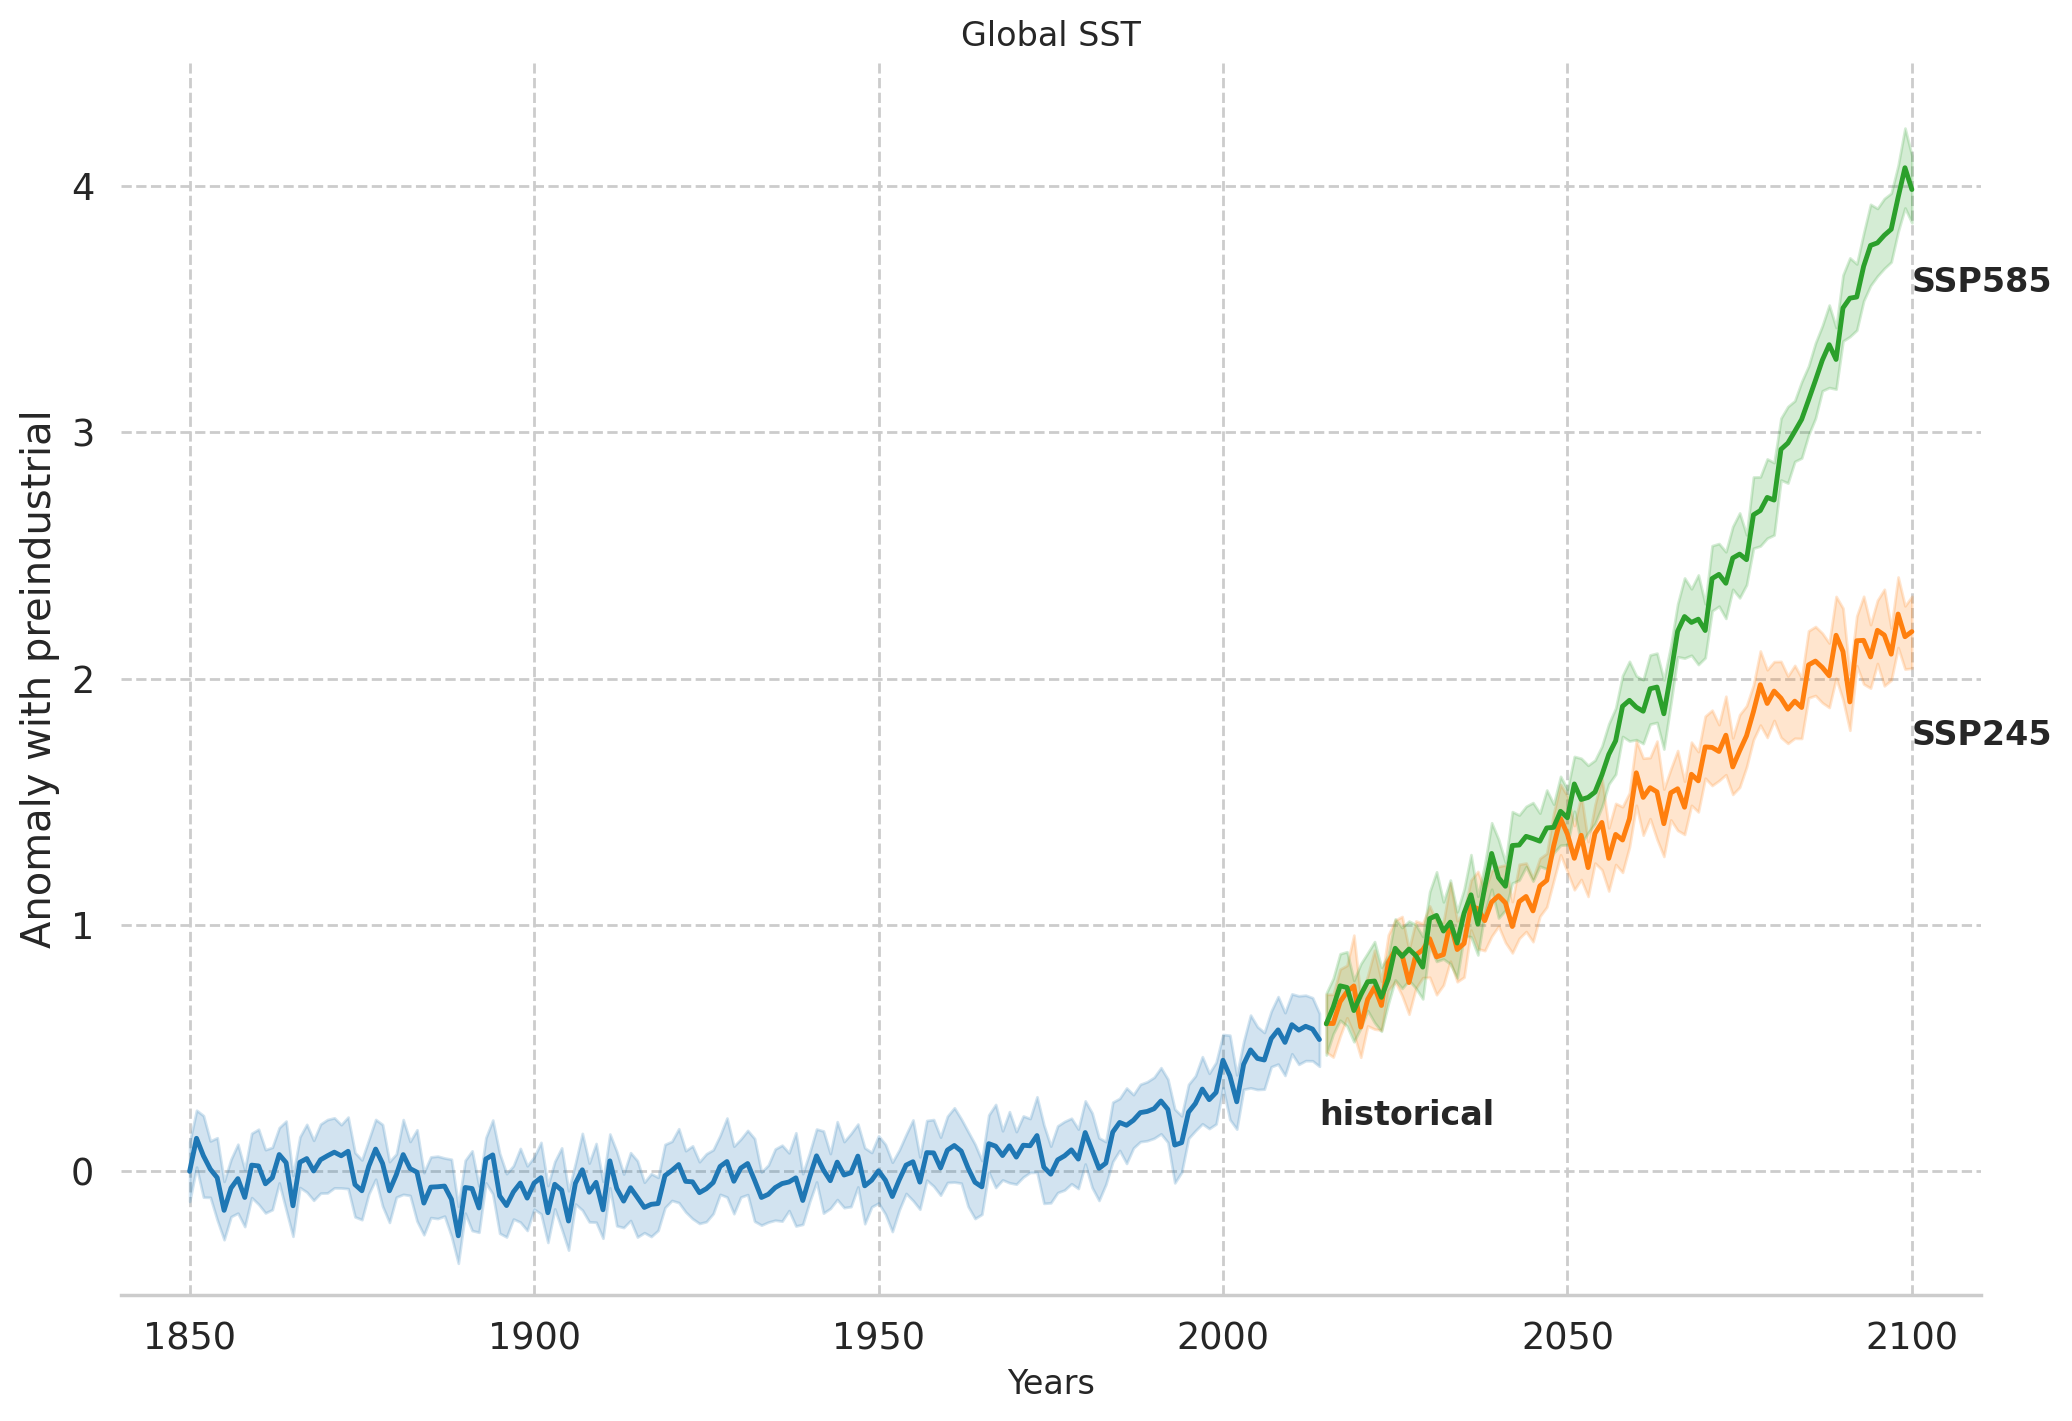

In [9]:
# Definimos el contexto y estilo de la figura haciendo uso de seaborn
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})
sns.set_style("whitegrid")
custom_style = {
            'grid.color': '0.8',
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
}
sns.set_style(custom_style) 
palette = sns.color_palette("mako_r", 6)
# ----------------------------------------------------------------------
# Definimos la figura
fig = plt.figure(figsize=(12, 8))    
gs = gridspec.GridSpec(1,1)
gs.update(wspace=0.5, hspace=0.25)
# ----------------------------------------------------------------------
# Definimos los ejes de la figura
ax1 = plt.subplot(111)
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(True)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False)
# ----------------------------------------------------------------------
# Ponemos títulos y etiquetas
ax1.set_title('Global SST',
              fontsize=12)
ax1.set_xlabel('Years',fontsize=12)
ax1.set_ylabel('Anomaly with preindustrial')
# ----------------------------------------------------------------------
# Pintamos
g=sns.lineplot(x=(ds_hist_ts-pi_value).time.dt.year,
               y=(ds_hist_ts-pi_value).values,
               lw=1.75,)
plt.text(
        (ds_hist_ts-pi_value).time.dt.year[-1],
        ((ds_hist_ts-pi_value).values[-1:] - (ds_hist_ts-pi_value).values[0]),"historical",
        fontsize=12,
        alpha=1,weight='bold') # De esta forma incluimos un texto en la figura para informar de la simulación pintada
g=sns.lineplot(x=(ds_s245_ts-pi_value).time.dt.year,
               y=(ds_s245_ts-pi_value).values,
               lw=1.75,)
plt.text(
        (ds_s245_ts-pi_value).time.dt.year[-1],
        ((ds_s245_ts-pi_value).values[-1:] - (ds_s245_ts-pi_value).values[10]),"SSP245",
        fontsize=12,
        alpha=1,weight='bold')
g=sns.lineplot(x=(ds_s585_ts-pi_value).time.dt.year,
               y=(ds_s585_ts-pi_value).values,
               lw=1.75,)
plt.text(
        (ds_s585_ts-pi_value).time.dt.year[-1],
        ((ds_s585_ts-pi_value).values[-1:] - (ds_s585_ts-pi_value).values[10]),"SSP585",
        fontsize=12,
        alpha=1,weight='bold')
# ----------------------------------------------------------------------
# Límites
g.set_ylim(-0.5,4.5)
g.set_xlim(1840,2110)

plt.show()

In [10]:
import cmocean as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

# Esta variable es un fichero para pintar la superficie continental en el mapa
land_10m = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='face',
    facecolor=cfeature.COLORS['land']
    )


Podemos igualmente calcular las *anomalías a final de siglo* en relación al momento preindustrial.
De esta forma vemos el efecto de la acción del hombre sobre el clima siguendo los dos escenarios que tenemos en cuenta.

In [11]:
anom_s585 = (
    ds_s585.tos.sel(time=slice('2070','2100')).mean('time') - 
    ds_hist.tos.sel(time=slice('1850','1880')).mean('time')
) # Intentamos coger rangos temporales de 30 años, que sean representativos de un periodo.
anom_s245 = (
    ds_s245.tos.sel(time=slice('2070','2100')).mean('time') - 
    ds_hist.tos.sel(time=slice('1850','1880')).mean('time')
)
anom_t = [anom_s245,anom_s585]

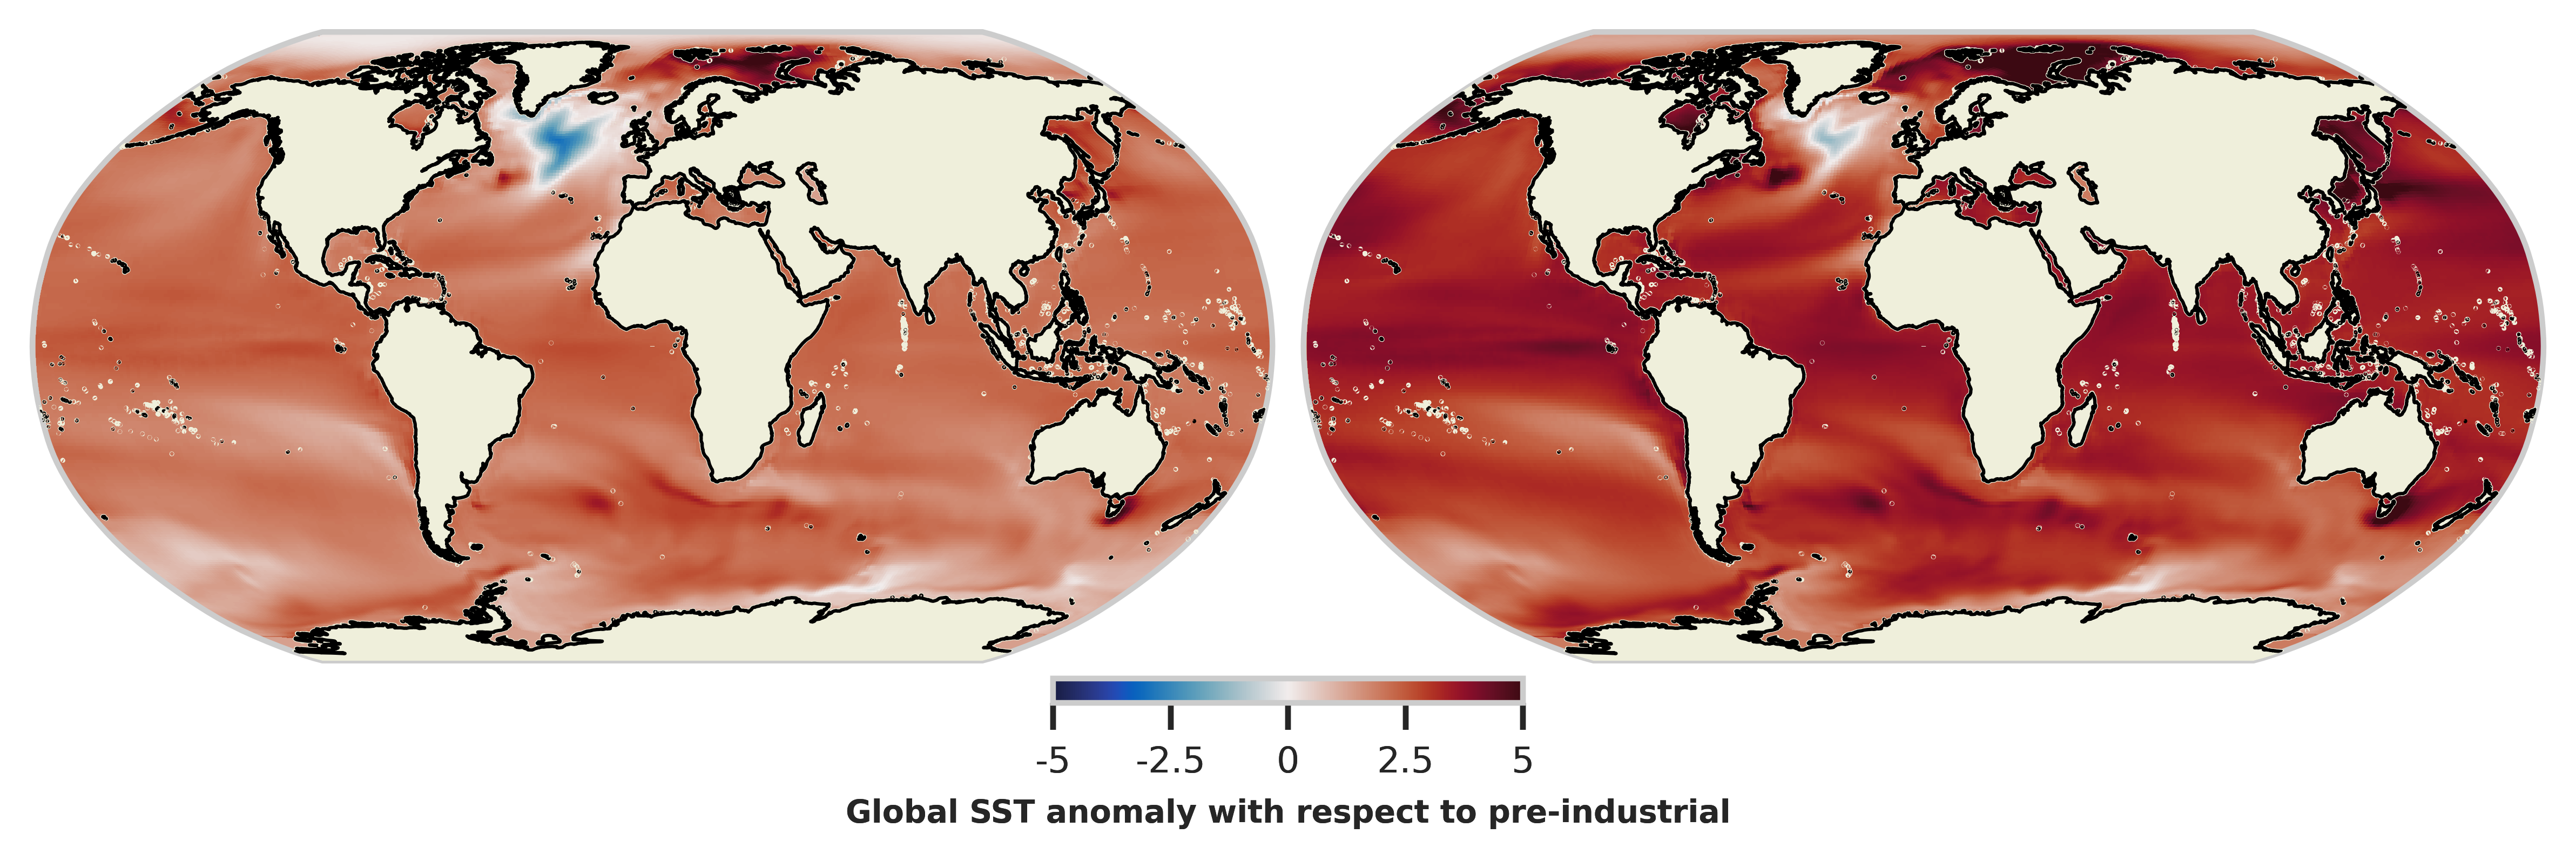

In [12]:
# ----------------------------------------------------------------------
# Definimos la figura
fig = plt.figure(figsize=(10, 5),dpi=300)
gs = gridspec.GridSpec(1,2)
gs.update(wspace=0.025, hspace=0.025)
# ----------------------------------------------------------------------
# Elegimos una proyección
proj = ccrs.Robinson(central_longitude=0, globe=None)
# ----------------------------------------------------------------------


# ----------------------------------------------------------------------
# Pintamos la figura
for item in [0,1]: # En este caso vamos a hacerlo en un loop para pintar los dos escenarios
    # ----------------------------
    # Definimos los ejes
    ax0 = plt.subplot(gs[item],
                     projection=proj)
    ax0.set_global()
    ax0.add_feature(land_10m,zorder=10,rasterized=True,) # Put the backgroun land
    ax0.coastlines(resolution='50m',linewidth=0.75,zorder=10,rasterized=True,) 
    # ----------------------------
    # Ponemos título a cada escenario
    if item == 0:
        ax0.set_title('SSP245',size=8,fontweight='bold')
    else:
        ax0.set_title('SSP585',size=8,fontweight='bold')
    # ----------------------------
    # Pintamos
    mm = anom_t[item].plot(x='lon',y='lat',
                           vmin=-5,vmax=5,
                           transform=ccrs.PlateCarree(),
                           cmap = cmo.cm.balance,
                           add_colorbar=False,
                           rasterized=True,
                           ax=ax0)
    ax0.autoscale_view()
    # ----------------------------
    # Pintamos una barra de colores común
    cax = fig.add_axes([0.44,.275, 0.145, 0.015])
    cbar= fig.colorbar(mm, cax,
                       extend='neither',orientation='horizontal')
    cbar.set_ticks([-5,-2.5,0,2.5,5])
    cbar.set_ticklabels([-5,-2.5,0,2.5,5])
    cbar.set_label('Global SST anomaly with respect to pre-industrial',
                   size=7,fontweight='bold')
    cbar.ax.tick_params(labelsize=8,)

plt.show()

De la misma forma, podemos ver cómo de diferente será un mundo a final de siglo con los escenarios considerados en relación a hoy día

Para ello, empezaremos concatenando las simulaciones, ya que si queremos coger un rando de unos 30 años representativo del mundo actual (2000-2025), debemos usar el final del *historical* y el inicio de los *ssp*

In [ ]:
ds_hist_s245 = xr.concat([ds_hist,ds_s245],dim='time')
ds_hist_s585 = xr.concat([ds_hist,ds_s585],dim='time')

#### Como el concatenar los archivos lleva bastante tiempo, podemos hacerlo en relacion a los últimos años de la simulacion *historical*; no es exactamente lo mismo, pero sí una buena aproximacion

In [13]:
anom_s245_current = (
    ds_s245.tos.sel(time=slice('2085','2100')).mean('time') - 
    ds_hist.tos.sel(time=slice('2000','2014')).mean('time')
)
anom_s585_current = (
    ds_s585.tos.sel(time=slice('2085','2100')).mean('time') - 
    ds_hist.tos.sel(time=slice('2000','2014')).mean('time')
)
anom_t_current = [anom_s245_current,anom_s585_current]

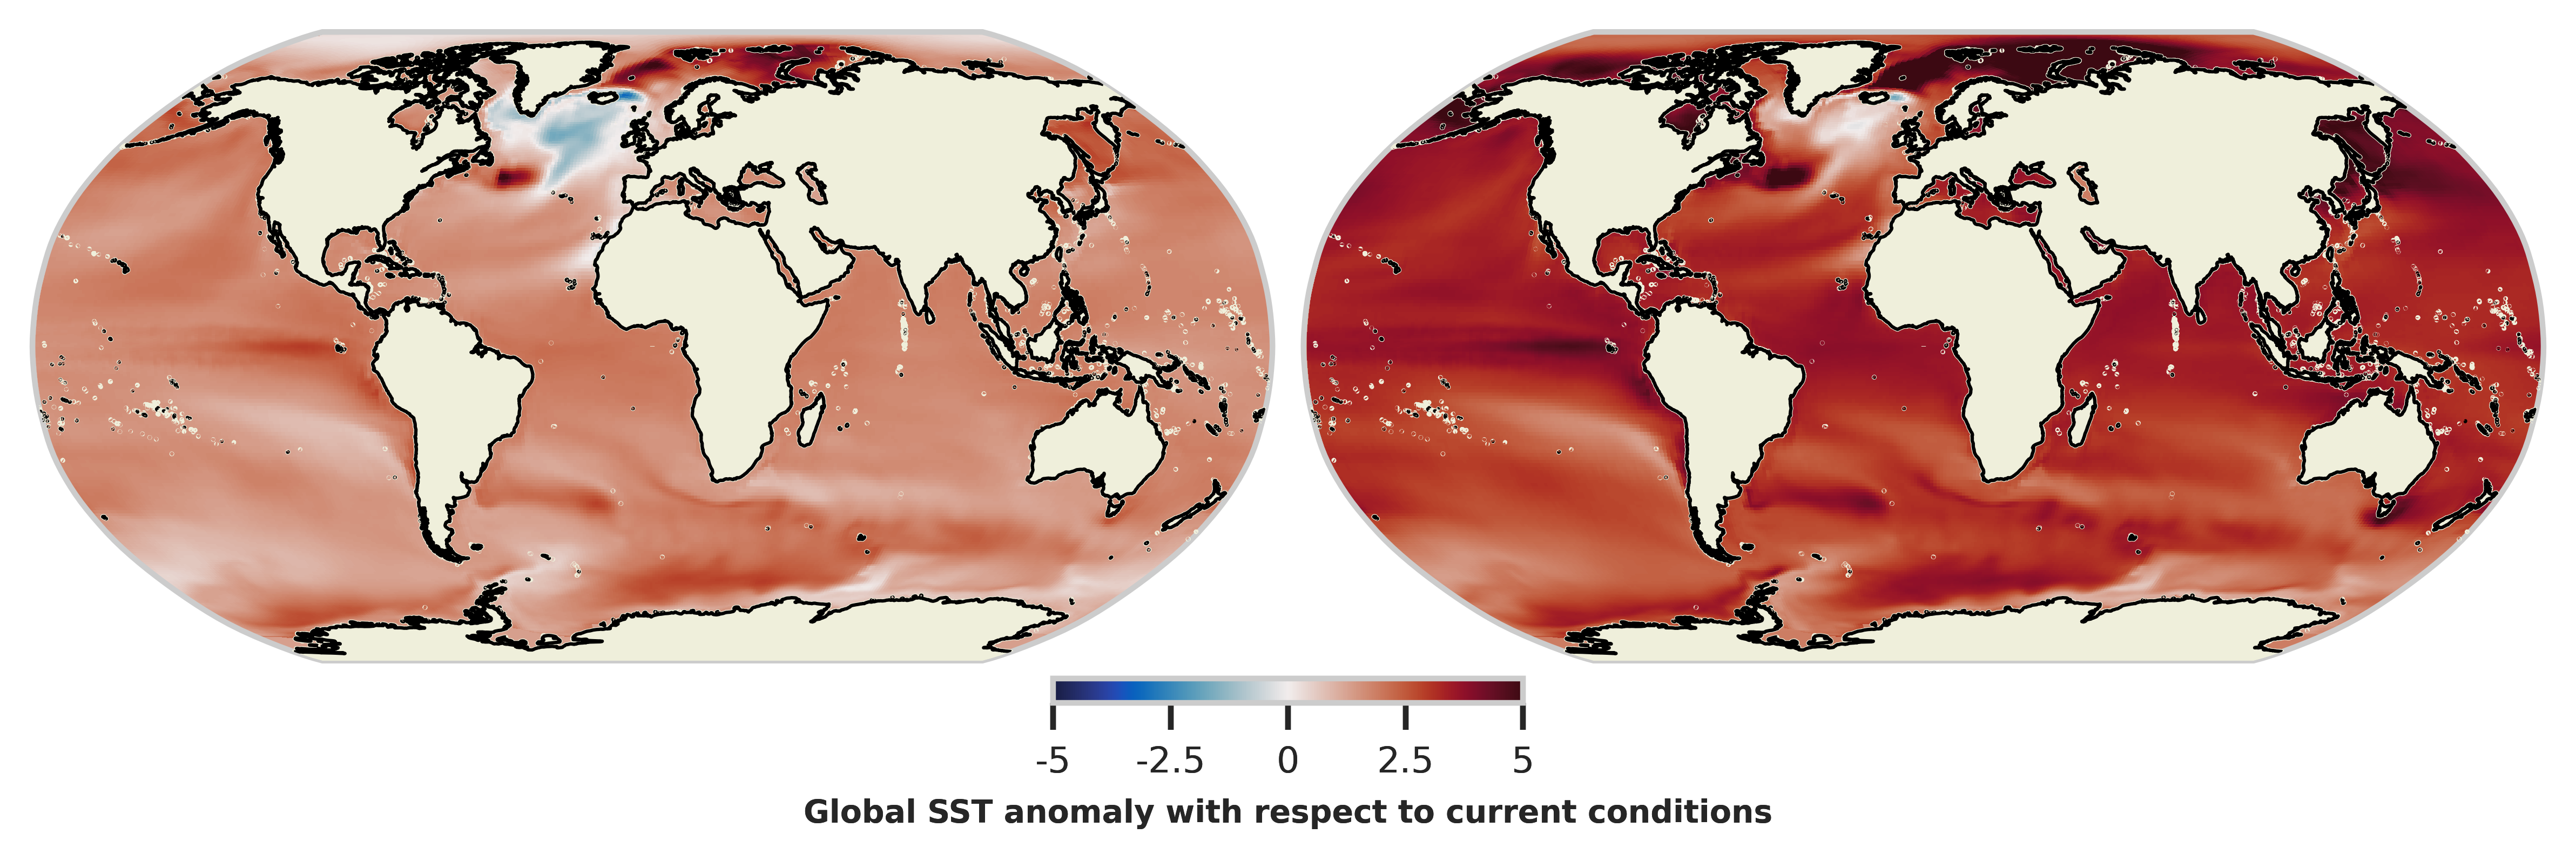

In [14]:
# ----------------------------------------------------------------------
# Definimos la figura
fig = plt.figure(figsize=(10, 5),dpi=300)
gs = gridspec.GridSpec(1,2)
gs.update(wspace=0.025, hspace=0.025)
# ----------------------------------------------------------------------
# Elegimos una proyección
proj = ccrs.Robinson(central_longitude=0, globe=None)
# ----------------------------------------------------------------------


# ----------------------------------------------------------------------
# Pintamos la figura
for item in [0,1]: # En este caso vamos a hacerlo en un loop para pintar los dos escenarios
    # ----------------------------
    # Definimos los ejes
    ax0 = plt.subplot(gs[item],
                     projection=proj)
    ax0.set_global()
    ax0.add_feature(land_10m,zorder=10,rasterized=True,) # Put the backgroun land
    ax0.coastlines(resolution='50m',linewidth=0.75,zorder=10,rasterized=True,) 
    # ----------------------------
    # Ponemos título a cada escenario
    if item == 0:
        ax0.set_title('SSP245',size=8,fontweight='bold')
    else:
        ax0.set_title('SSP585',size=8,fontweight='bold')
    # ----------------------------
    # Pintamos
    mm = anom_t_current[item].plot(x='lon',y='lat',
                                   vmin=-5,vmax=5,
                                   transform=ccrs.PlateCarree(),
                                   cmap = cmo.cm.balance,
                                   add_colorbar=False,
                                   rasterized=True,
                                   ax=ax0)
    ax0.autoscale_view()
    # ----------------------------
    # Pintamos una barra de colores común
    cax = fig.add_axes([0.44,.275, 0.145, 0.015])
    cbar= fig.colorbar(mm, cax,
                       extend='neither',orientation='horizontal')
    cbar.set_ticks([-5,-2.5,0,2.5,5])
    cbar.set_ticklabels([-5,-2.5,0,2.5,5])
    cbar.set_label('Global SST anomaly with respect to current conditions',
                   size=7,fontweight='bold')
    cbar.ax.tick_params(labelsize=8,)

plt.show()

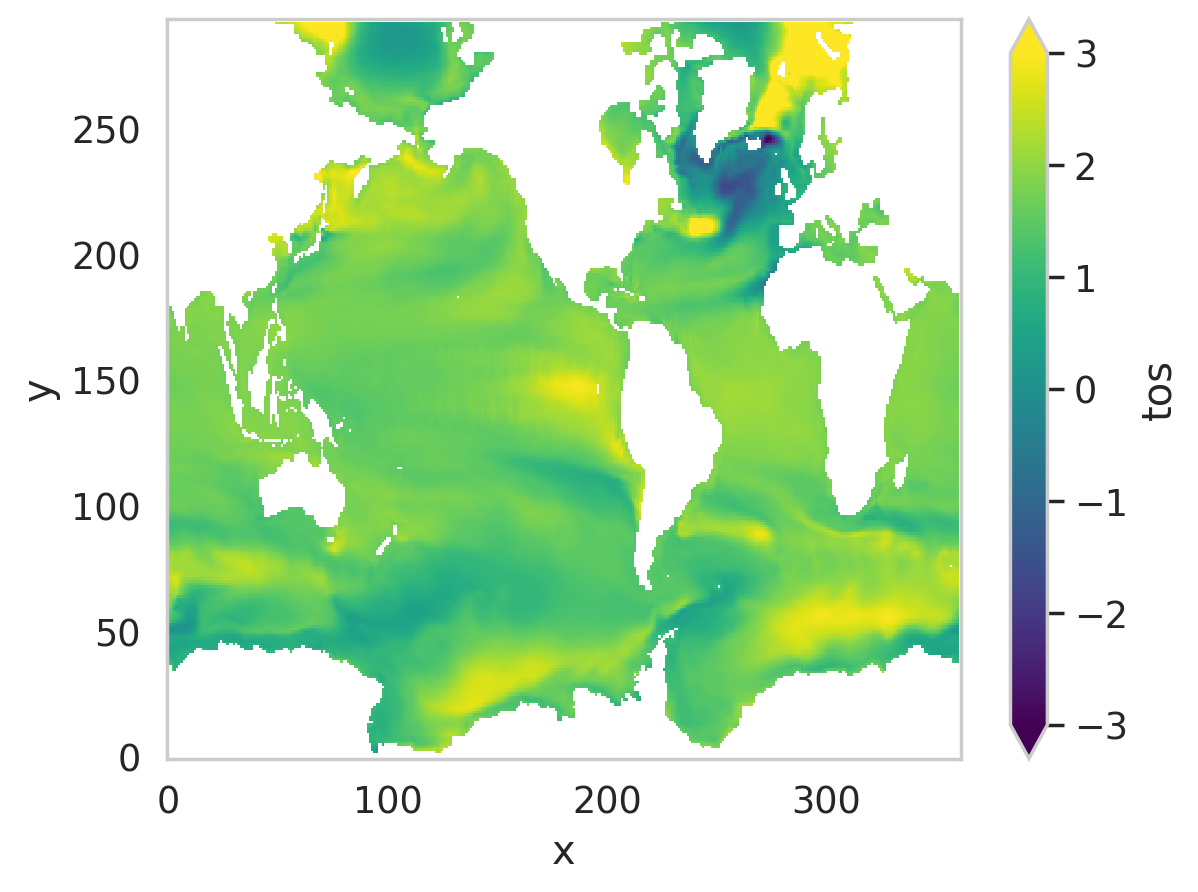

In [21]:
anom_s245_current.plot(vmin=-3,vmax=3)